In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()

In [2]:
np.random.seed(555)
y = pd.Series(np.random.randn(1000),
             index = pd.date_range("2000-1-1", periods = 1000))

In [3]:
y_cumsum = y.cumsum() #累積和

In [4]:
y

2000-01-01    0.148227
2000-01-02    0.353487
2000-01-03   -1.087250
2000-01-04    0.247096
2000-01-05   -0.156840
2000-01-06    0.437086
2000-01-07   -0.846221
2000-01-08    2.166546
2000-01-09    0.334282
2000-01-10   -0.377876
2000-01-11    0.596387
2000-01-12    2.053356
2000-01-13   -0.040022
2000-01-14   -0.576821
2000-01-15   -0.060936
2000-01-16    0.997778
2000-01-17    1.775045
2000-01-18   -1.337874
2000-01-19    0.798311
2000-01-20   -1.762909
2000-01-21   -0.264704
2000-01-22   -0.057025
2000-01-23   -1.934483
2000-01-24   -1.495271
2000-01-25    0.045468
2000-01-26    2.326894
2000-01-27    0.471016
2000-01-28   -0.953541
2000-01-29   -0.171484
2000-01-30   -0.189494
                ...   
2002-08-28   -0.353047
2002-08-29   -1.139269
2002-08-30    0.782776
2002-08-31    0.522386
2002-09-01   -0.369481
2002-09-02    2.076931
2002-09-03    0.273551
2002-09-04   -0.938943
2002-09-05    1.945791
2002-09-06   -1.851262
2002-09-07   -0.962987
2002-09-08    0.489461
2002-09-09 

In [5]:
y_cumsum

2000-01-01     0.148227
2000-01-02     0.501714
2000-01-03    -0.585536
2000-01-04    -0.338440
2000-01-05    -0.495280
2000-01-06    -0.058194
2000-01-07    -0.904415
2000-01-08     1.262130
2000-01-09     1.596412
2000-01-10     1.218536
2000-01-11     1.814923
2000-01-12     3.868279
2000-01-13     3.828257
2000-01-14     3.251436
2000-01-15     3.190500
2000-01-16     4.188279
2000-01-17     5.963323
2000-01-18     4.625449
2000-01-19     5.423760
2000-01-20     3.660851
2000-01-21     3.396147
2000-01-22     3.339122
2000-01-23     1.404639
2000-01-24    -0.090632
2000-01-25    -0.045164
2000-01-26     2.281731
2000-01-27     2.752747
2000-01-28     1.799206
2000-01-29     1.627722
2000-01-30     1.438228
                ...    
2002-08-28   -47.282870
2002-08-29   -48.422139
2002-08-30   -47.639363
2002-08-31   -47.116977
2002-09-01   -47.486457
2002-09-02   -45.409527
2002-09-03   -45.135975
2002-09-04   -46.074918
2002-09-05   -44.129127
2002-09-06   -45.980389
2002-09-07   -46

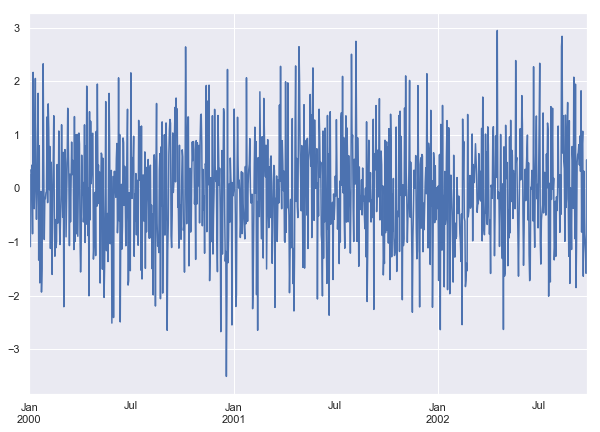

In [6]:
y.plot(figsize=(10,7))

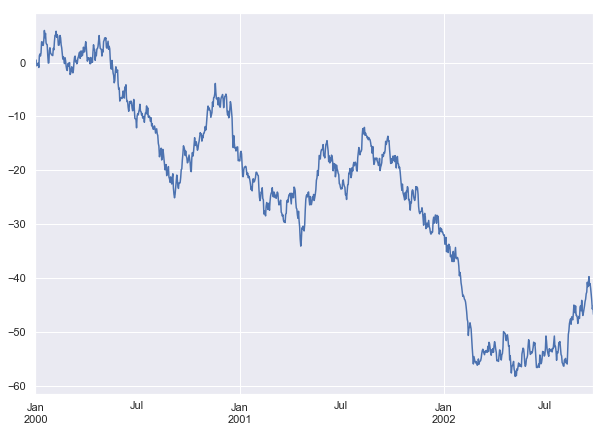

In [7]:
y_cumsum.plot(figsize=(10,7))

In [8]:
# ADF検定を行う

from statsmodels.tsa import stattools

# ADF 検定
# トレンド項あり（2次まで）、定数項あり
# 出力値は先頭からt統計量、p値、使用されたラグの数、計算に使用されたデータ数、検定統計量に対する各棄却値、AICの最大値
ctt = stattools.adfuller(y_cumsum, regression="ctt")
# トレンド項あり（1次）、定数項あり
ct = stattools.adfuller(y_cumsum, regression="ct")
# トレンド項なし、定数項あり
c = stattools.adfuller(y_cumsum, regression="c")
# トレンド項なし、定数項なし
nc = stattools.adfuller(y_cumsum, regression="nc")
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-2.302420361678621, 0.6783837507903019, 10, 989, {'1%': -4.382884053498889, '5%': -3.838374276893754, '10%': -3.5569657804360864}, 2803.5530138641516)
ct:
(-2.3490401210492013, 0.4070374629839823, 10, 989, {'1%': -3.967952994278947, '5%': -3.4149385165727604, '10%': -3.1296683938683643}, 2801.5602326599537)
c:
(-1.1156341711927658, 0.7087970795121928, 10, 989, {'1%': -3.436979275944879, '5%': -2.8644668170148058, '10%': -2.5683283824496153}, 2803.738691121736)
nc:
(0.4164279474748902, 0.8049809276710718, 10, 989, {'1%': -2.5680043754709283, '5%': -1.9412749954552935, '10%': -1.6165541943930175}, 2804.6580844275595)


# ↑p>=0.05より、帰無仮説「単位根過程である」を棄却出来ない。
# よって全て単位根過程でないとは言えない。（＝全て単位根過程である）

In [9]:
# 次に1階差分を取ったデータを考える
y_cumsum_diff = y_cumsum.diff().dropna()

In [10]:
y_cumsum_diff

2000-01-02    0.353487
2000-01-03   -1.087250
2000-01-04    0.247096
2000-01-05   -0.156840
2000-01-06    0.437086
2000-01-07   -0.846221
2000-01-08    2.166546
2000-01-09    0.334282
2000-01-10   -0.377876
2000-01-11    0.596387
2000-01-12    2.053356
2000-01-13   -0.040022
2000-01-14   -0.576821
2000-01-15   -0.060936
2000-01-16    0.997778
2000-01-17    1.775045
2000-01-18   -1.337874
2000-01-19    0.798311
2000-01-20   -1.762909
2000-01-21   -0.264704
2000-01-22   -0.057025
2000-01-23   -1.934483
2000-01-24   -1.495271
2000-01-25    0.045468
2000-01-26    2.326894
2000-01-27    0.471016
2000-01-28   -0.953541
2000-01-29   -0.171484
2000-01-30   -0.189494
2000-01-31   -0.082069
                ...   
2002-08-28   -0.353047
2002-08-29   -1.139269
2002-08-30    0.782776
2002-08-31    0.522386
2002-09-01   -0.369481
2002-09-02    2.076931
2002-09-03    0.273551
2002-09-04   -0.938943
2002-09-05    1.945791
2002-09-06   -1.851262
2002-09-07   -0.962987
2002-09-08    0.489461
2002-09-09 

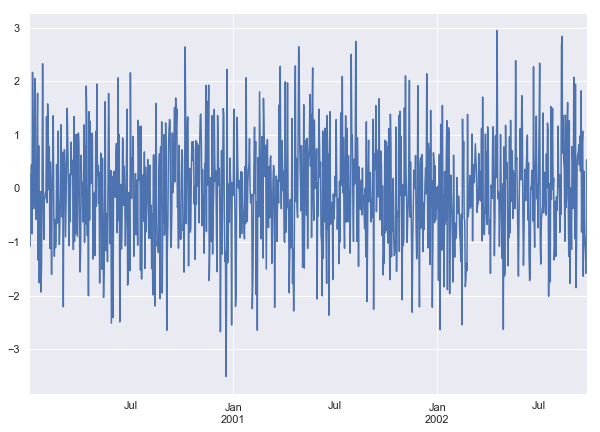

In [11]:
y_cumsum_diff.plot(figsize=(10,7))

In [12]:
# ADF検定を行う

# トレンド項あり（2次まで）、定数項あり
# 出力値は先頭からt統計量、p値、使用されたラグの数、計算に使用されたデータ数、検定統計量に対する各棄却値、AICの最大値
ctt = stattools.adfuller(y_cumsum_diff, regression="ctt")
# トレンド項あり（1次）、定数項あり
ct = stattools.adfuller(y_cumsum_diff, regression="ct")
# トレンド項なし、定数項あり
c = stattools.adfuller(y_cumsum_diff, regression="c")
# トレンド項なし、定数項なし
nc = stattools.adfuller(y_cumsum_diff, regression="nc")
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-8.600587737734987, 1.1342558163566746e-11, 9, 989, {'1%': -4.382884053498889, '5%': -3.838374276893754, '10%': -3.5569657804360864}, 2802.203747178166)
ct:
(-8.602960913048204, 2.911439270162834e-12, 9, 989, {'1%': -3.967952994278947, '5%': -3.4149385165727604, '10%': -3.1296683938683643}, 2800.5525167664287)
c:
(-8.60660682685066, 6.64626051881465e-14, 9, 989, {'1%': -3.436979275944879, '5%': -2.8644668170148058, '10%': -2.5683283824496153}, 2798.559347495873)
nc:
(-8.496548069162284, 2.410108591966072e-14, 9, 989, {'1%': -2.5680043754709283, '5%': -1.9412749954552935, '10%': -1.6165541943930175}, 2798.2856379684285)


# ↑p<0.05より、帰無仮説「単位根過程である」を棄却出来た。
# よって全て単位根過程でないと言える。（＝全て弱定常過程である）

In [47]:
# アメリカのGDPのデータ
import pandas_datareader.data as web
from datetime import datetime

start = datetime(2000, 1, 1)
end = datetime(2020, 10,31)
US_GDP = web.DataReader('GDP', 'fred', start, end)

In [48]:
US_GDP.head()

,GDP
DATE,
2000-01-01,10002.857
2000-04-01,10247.679
2000-07-01,10319.825
2000-10-01,10439.025
2001-01-01,10472.879


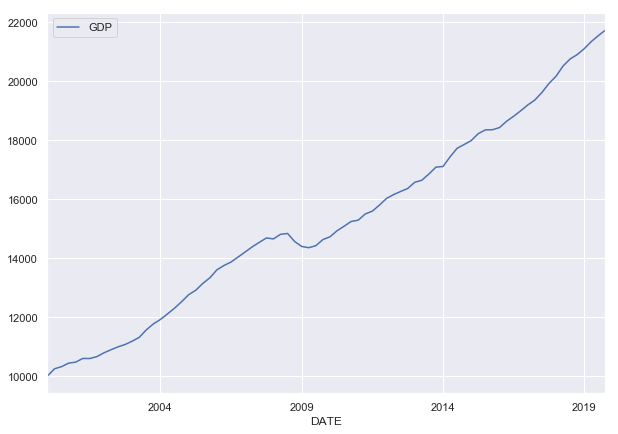

In [49]:
US_GDP.plot(figsize=(10,7))

In [51]:
# ADF検定を行う

# トレンド項あり（2次まで）、定数項あり
# 出力値は先頭からt統計量、p値、使用されたラグの数、計算に使用されたデータ数、検定統計量に対する各棄却値、AICの最大値
ctt = stattools.adfuller(US_GDP.GDP, regression="ctt")
# トレンド項あり（1次）、定数項あり
ct = stattools.adfuller(US_GDP.GDP, regression="ct")
# トレンド項なし、定数項あり
c = stattools.adfuller(US_GDP.GDP, regression="c")
# トレンド項なし、定数項なし
nc = stattools.adfuller(US_GDP.GDP, regression="nc")
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-2.2419904514441935, 0.7093392386800397, 3, 76, {'1%': -4.5305686349139815, '5%': -3.912528429435778, '10%': -3.60247379893206}, 791.9215016883795)
ct:
(-1.7425444722576577, 0.7317817090165932, 3, 76, {'1%': -4.083117090957137, '5%': -3.4699261887665838, '10%': -3.161801570928707}, 798.9752567479406)
c:
(1.6182724005168343, 0.997911372402649, 1, 78, {'1%': -3.517113604831504, '5%': -2.8993754262546574, '10%': -2.5869547797501644}, 798.7536090672238)
nc:
(4.6874597694754785, 0.999999999991685, 1, 78, {'1%': -2.5950002564102563, '5%': -1.944930885129554, '10%': -1.6138075115898785}, 797.0788319250817)


# ↑p>=0.05より、帰無仮説「単位根過程である」を棄却出来ない。
# よって全て単位根過程でないとは言えない。（＝全て単位根過程である）

In [52]:
# 次に1階差分を取ったデータを考える
US_GDP_diff = US_GDP.diff().dropna()

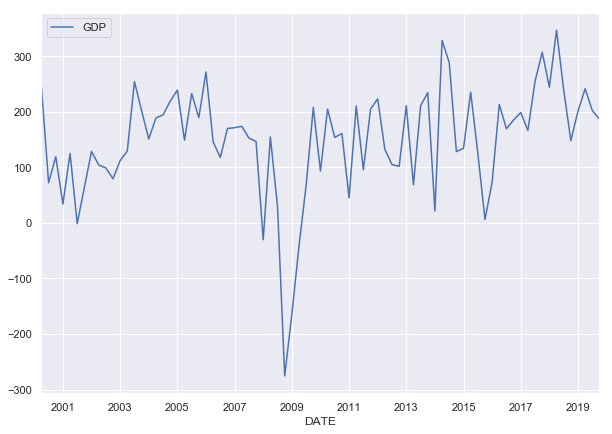

In [53]:
US_GDP_diff.plot(figsize=(10,7))

In [54]:
# ADF検定を行う

# トレンド項あり（2次まで）、定数項あり
# 出力値は先頭からt統計量、p値、使用されたラグの数、計算に使用されたデータ数、検定統計量に対する各棄却値、AICの最大値
ctt = stattools.adfuller(US_GDP_diff.GDP, regression="ctt")
# トレンド項あり（1次）、定数項あり
ct = stattools.adfuller(US_GDP_diff.GDP, regression="ct")
# トレンド項なし、定数項あり
c = stattools.adfuller(US_GDP_diff.GDP, regression="c")
# トレンド項なし、定数項なし
nc = stattools.adfuller(US_GDP_diff.GDP, regression="nc")
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-5.63422053580019, 6.994516781241348e-05, 0, 78, {'1%': -4.526287997016133, '5%': -3.910406282304152, '10%': -3.6011818703113674}, 785.4632015202386)
ct:
(-5.614276502145275, 1.3642932191391521e-05, 0, 78, {'1%': -4.079790666649808, '5%': -3.468358000977764, '10%': -3.160891012997522}, 787.6538827274336)
c:
(-5.262300805435541, 6.551135819901592e-06, 0, 78, {'1%': -3.517113604831504, '5%': -2.8993754262546574, '10%': -2.5869547797501644}, 786.4629196330173)
nc:
(-1.1788130691463874, 0.2178195466425843, 2, 76, {'1%': -2.595786364265928, '5%': -1.945045666733489, '10%': -1.613737358579968}, 791.9289298887627)


# ↑トレンド項なし、定数項なし以外のモデルではp<0.05より、帰無仮説「単位根過程である」を棄却出来た。
# よって全て単位根過程でないと言える。（＝全て弱定常過程である）

In [29]:
# ランダムウォーク1(AR(1)過程）を発生させる
# 平均0, 分散1の正規分布から発生させた乱数100個
np.random.seed(555)
arr = np.random.normal(0,1,100)

In [30]:
# 平均0, 標準偏差10の正規分布から発生させた乱数100個
wn = np.random.normal(0,10,100)
# 定数c
c = 2
# φ１
fai_1 = 1.0
# 初期値y0=0
map1 = [0]

for i in range(1,len(wn)):
    map1.append(c+fai_1*map1[i-1]+wn[i])

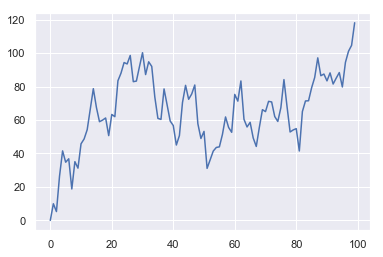

In [31]:
plt.plot(map1)